In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = r"C:\Users\JITENDRA\Downloads\GWQ_2010-2018_01.xlsx"
df = pd.read_excel(file_path)
# Now you can work with the DataFrame `df` as needed
print(df.head(5))

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME  ... FLUORIDE  SAR  RSC   SiO2  PO4      TDS  \
0        Shoal  Bay– 15 No.  ...     0.37  NaN  NaN  13.97  NaN  217.748   
1  South Creek (Sunderga

In [3]:
df.shape

(85197, 37)

In [4]:
new_df = df[['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE', 'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME', 'BASIN_NAME', 'PROJECT_NAME', 'year', 'FLUORIDE']]
print(new_df.head(5))

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME            BASIN_NAME  \
0        Shoal  Bay– 15 No.         South_Andaman   
1  South Creek (Sundergarh)         South_Andaman   
2                

In [5]:
# Convert 'K' column to float
new_df['FLUORIDE'] = pd.to_numeric(new_df['FLUORIDE'], errors='coerce')

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_12768\1658879459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FLUORIDE'] = pd.to_numeric(new_df['FLUORIDE'], errors='coerce')


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85197 entries, 0 to 85196
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        85197 non-null  object 
 1   WRIS ID        85197 non-null  object 
 2   LATITUDE       84916 non-null  object 
 3   LONGITUDE      84916 non-null  object 
 4   SITE_TYPE      85197 non-null  object 
 5   STATE_NAME     85197 non-null  object 
 6   DISTRICT_NAME  85196 non-null  object 
 7   TAHSIL_NAME    85085 non-null  object 
 8   BLOCK_NAME     85071 non-null  object 
 9   SITE_NAME      85197 non-null  object 
 10  BASIN_NAME     85197 non-null  object 
 11  PROJECT_NAME   85197 non-null  object 
 12  year           85197 non-null  int64  
 13  FLUORIDE       79491 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 9.1+ MB


In [7]:
import re

def convert_coordinates(coord):
    if isinstance(coord, str):
        # Extract degrees, minutes, and seconds from the string
        matches = re.findall(r"\d+\.\d+|\d+", coord)
        if len(matches) >= 2:
            degrees, minutes = map(float, matches[:2])
            # Convert degrees and minutes to decimal values
            decimal_coord = degrees + minutes / 60
            return decimal_coord
    return coord

# Apply the convert_coordinates function to the LATITUDE and LONGITUDE columns
new_df['LATITUDE'] = new_df['LATITUDE'].apply(convert_coordinates)
new_df['LONGITUDE'] = new_df['LONGITUDE'].apply(convert_coordinates)

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_12768\3171119565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LATITUDE'] = new_df['LATITUDE'].apply(convert_coordinates)
C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_12768\3171119565.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LONGITUDE'] = new_df['LONGITUDE'].apply(convert_coordinates)


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85197 entries, 0 to 85196
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        85197 non-null  object 
 1   WRIS ID        85197 non-null  object 
 2   LATITUDE       84916 non-null  object 
 3   LONGITUDE      84916 non-null  object 
 4   SITE_TYPE      85197 non-null  object 
 5   STATE_NAME     85197 non-null  object 
 6   DISTRICT_NAME  85196 non-null  object 
 7   TAHSIL_NAME    85085 non-null  object 
 8   BLOCK_NAME     85071 non-null  object 
 9   SITE_NAME      85197 non-null  object 
 10  BASIN_NAME     85197 non-null  object 
 11  PROJECT_NAME   85197 non-null  object 
 12  year           85197 non-null  int64  
 13  FLUORIDE       79491 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 9.1+ MB


In [9]:
new_df.isnull().sum()  # count the number of missing values in each column

SITE_ID             0
WRIS ID             0
LATITUDE          281
LONGITUDE         281
SITE_TYPE           0
STATE_NAME          0
DISTRICT_NAME       1
TAHSIL_NAME       112
BLOCK_NAME        126
SITE_NAME           0
BASIN_NAME          0
PROJECT_NAME        0
year                0
FLUORIDE         5706
dtype: int64

In [10]:
# Drop duplicates
new_df = new_df.drop_duplicates()
new_df = new_df.dropna()  #removes rows from the DataFrame df that contain missing values (NaN) in any column.
new_df.shape

(79211, 14)

In [11]:
new_df = new_df[new_df['FLUORIDE'] != 0]  # remove zero value in tds attributes
new_df = new_df[new_df['FLUORIDE'] != 0.0]
# Remove rows with missing values in the 'TDS' and 'SITE_TYPE' columns
new_df = new_df.dropna(subset=['FLUORIDE', 'SITE_TYPE'])
new_df.shape

(76659, 14)

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76659 entries, 0 to 85196
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        76659 non-null  object 
 1   WRIS ID        76659 non-null  object 
 2   LATITUDE       76659 non-null  object 
 3   LONGITUDE      76659 non-null  object 
 4   SITE_TYPE      76659 non-null  object 
 5   STATE_NAME     76659 non-null  object 
 6   DISTRICT_NAME  76659 non-null  object 
 7   TAHSIL_NAME    76659 non-null  object 
 8   BLOCK_NAME     76659 non-null  object 
 9   SITE_NAME      76659 non-null  object 
 10  BASIN_NAME     76659 non-null  object 
 11  PROJECT_NAME   76659 non-null  object 
 12  year           76659 non-null  int64  
 13  FLUORIDE       76659 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 8.8+ MB


In [13]:
new_df['LATITUDE'] = pd.to_numeric(new_df['LATITUDE'], errors='coerce')
new_df['LONGITUDE'] = pd.to_numeric(new_df['LONGITUDE'], errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76659 entries, 0 to 85196
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        76659 non-null  object 
 1   WRIS ID        76659 non-null  object 
 2   LATITUDE       76651 non-null  float64
 3   LONGITUDE      76652 non-null  float64
 4   SITE_TYPE      76659 non-null  object 
 5   STATE_NAME     76659 non-null  object 
 6   DISTRICT_NAME  76659 non-null  object 
 7   TAHSIL_NAME    76659 non-null  object 
 8   BLOCK_NAME     76659 non-null  object 
 9   SITE_NAME      76659 non-null  object 
 10  BASIN_NAME     76659 non-null  object 
 11  PROJECT_NAME   76659 non-null  object 
 12  year           76659 non-null  int64  
 13  FLUORIDE       76659 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 8.8+ MB


In [14]:
print(new_df[['LATITUDE', 'LONGITUDE', 'FLUORIDE']])

        LATITUDE  LONGITUDE  FLUORIDE
0      11.866389  92.736111      0.37
1      12.186944  92.791667      0.24
2      12.503889  92.859167      0.96
3      12.524722  92.970278      1.02
4      12.508333  92.960556      0.74
...          ...        ...       ...
85190  22.220000  87.570000      0.23
85191  22.540000  87.330000      0.37
85193  22.180000  87.160000      0.05
85194  22.580000  87.520000      0.38
85196  22.610000  86.810000      0.34

[76659 rows x 3 columns]


In [15]:
# Assuming you have already loaded and processed the dataset

# Check the range of K values
FLUORIDE_range = new_df['FLUORIDE'].describe()[['min', 'max']]
print(FLUORIDE_range)

min      0.0001
max    125.0000
Name: FLUORIDE, dtype: float64


In [16]:
# Define the bin edges for the clusters, For drinking water FLUORIDE content is 1ppm and max limit is 1.5
bin_edges = [float('-inf'), 1, 1.5, float('inf')]

# Define the cluster labels
cluster_labels = ['cluster1', 'cluster2', 'cluster3']

# Create a new column 'PH Cluster' with the cluster labels
new_df['FLUORIDE_Cluster'] = pd.cut(new_df['FLUORIDE'], bins=bin_edges, labels=cluster_labels, right=False)

# Print the DataFrame with the 'LATITUDE', 'LONGITUDE', and 'PH Cluster' columns
print(new_df[['LATITUDE', 'LONGITUDE', 'FLUORIDE_Cluster']])

# Print PH cluster vs count
cluster_counts = new_df['FLUORIDE_Cluster'].value_counts()
print(cluster_counts)

        LATITUDE  LONGITUDE FLUORIDE_Cluster
0      11.866389  92.736111         cluster1
1      12.186944  92.791667         cluster1
2      12.503889  92.859167         cluster1
3      12.524722  92.970278         cluster2
4      12.508333  92.960556         cluster1
...          ...        ...              ...
85190  22.220000  87.570000         cluster1
85191  22.540000  87.330000         cluster1
85193  22.180000  87.160000         cluster1
85194  22.580000  87.520000         cluster1
85196  22.610000  86.810000         cluster1

[76659 rows x 3 columns]
cluster1    63111
cluster2     7289
cluster3     6259
Name: FLUORIDE_Cluster, dtype: int64


In [17]:
print(cluster_labels)

new_df.describe()

['cluster1', 'cluster2', 'cluster3']


,LATITUDE,LONGITUDE,year,FLUORIDE
count,76651.000000,76652.000000,76659.000000,76659.000000
mean,21.035005,78.917451,2014.455106,0.656953
std,5.703994,26.988917,2.521794,1.132187
min,8.083333,0.000000,2010.000000,0.000100
25%,17.100000,75.683000,2012.000000,0.220000
50%,21.550000,77.733333,2015.000000,0.440000
75%,25.066667,81.645625,2017.000000,0.800000
max,81.644600,7414.000000,2018.000000,125.000000


In [18]:
# Assuming you already have the data in a DataFrame called 'df'

# Convert latitude and longitude columns to numeric values
new_df['LATITUDE'] = pd.to_numeric(new_df['LATITUDE'])
new_df['LONGITUDE'] = pd.to_numeric(new_df['LONGITUDE'])

# Create a GeoDataFrame using latitude and longitude coordinates
gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df['LONGITUDE'], new_df['LATITUDE']))

In [19]:
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
print(states_data.head(5))

               ST_NM                                           geometry
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.79420...
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...


In [20]:
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')
districts_data.head(5)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_12768\3416732161.py:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))


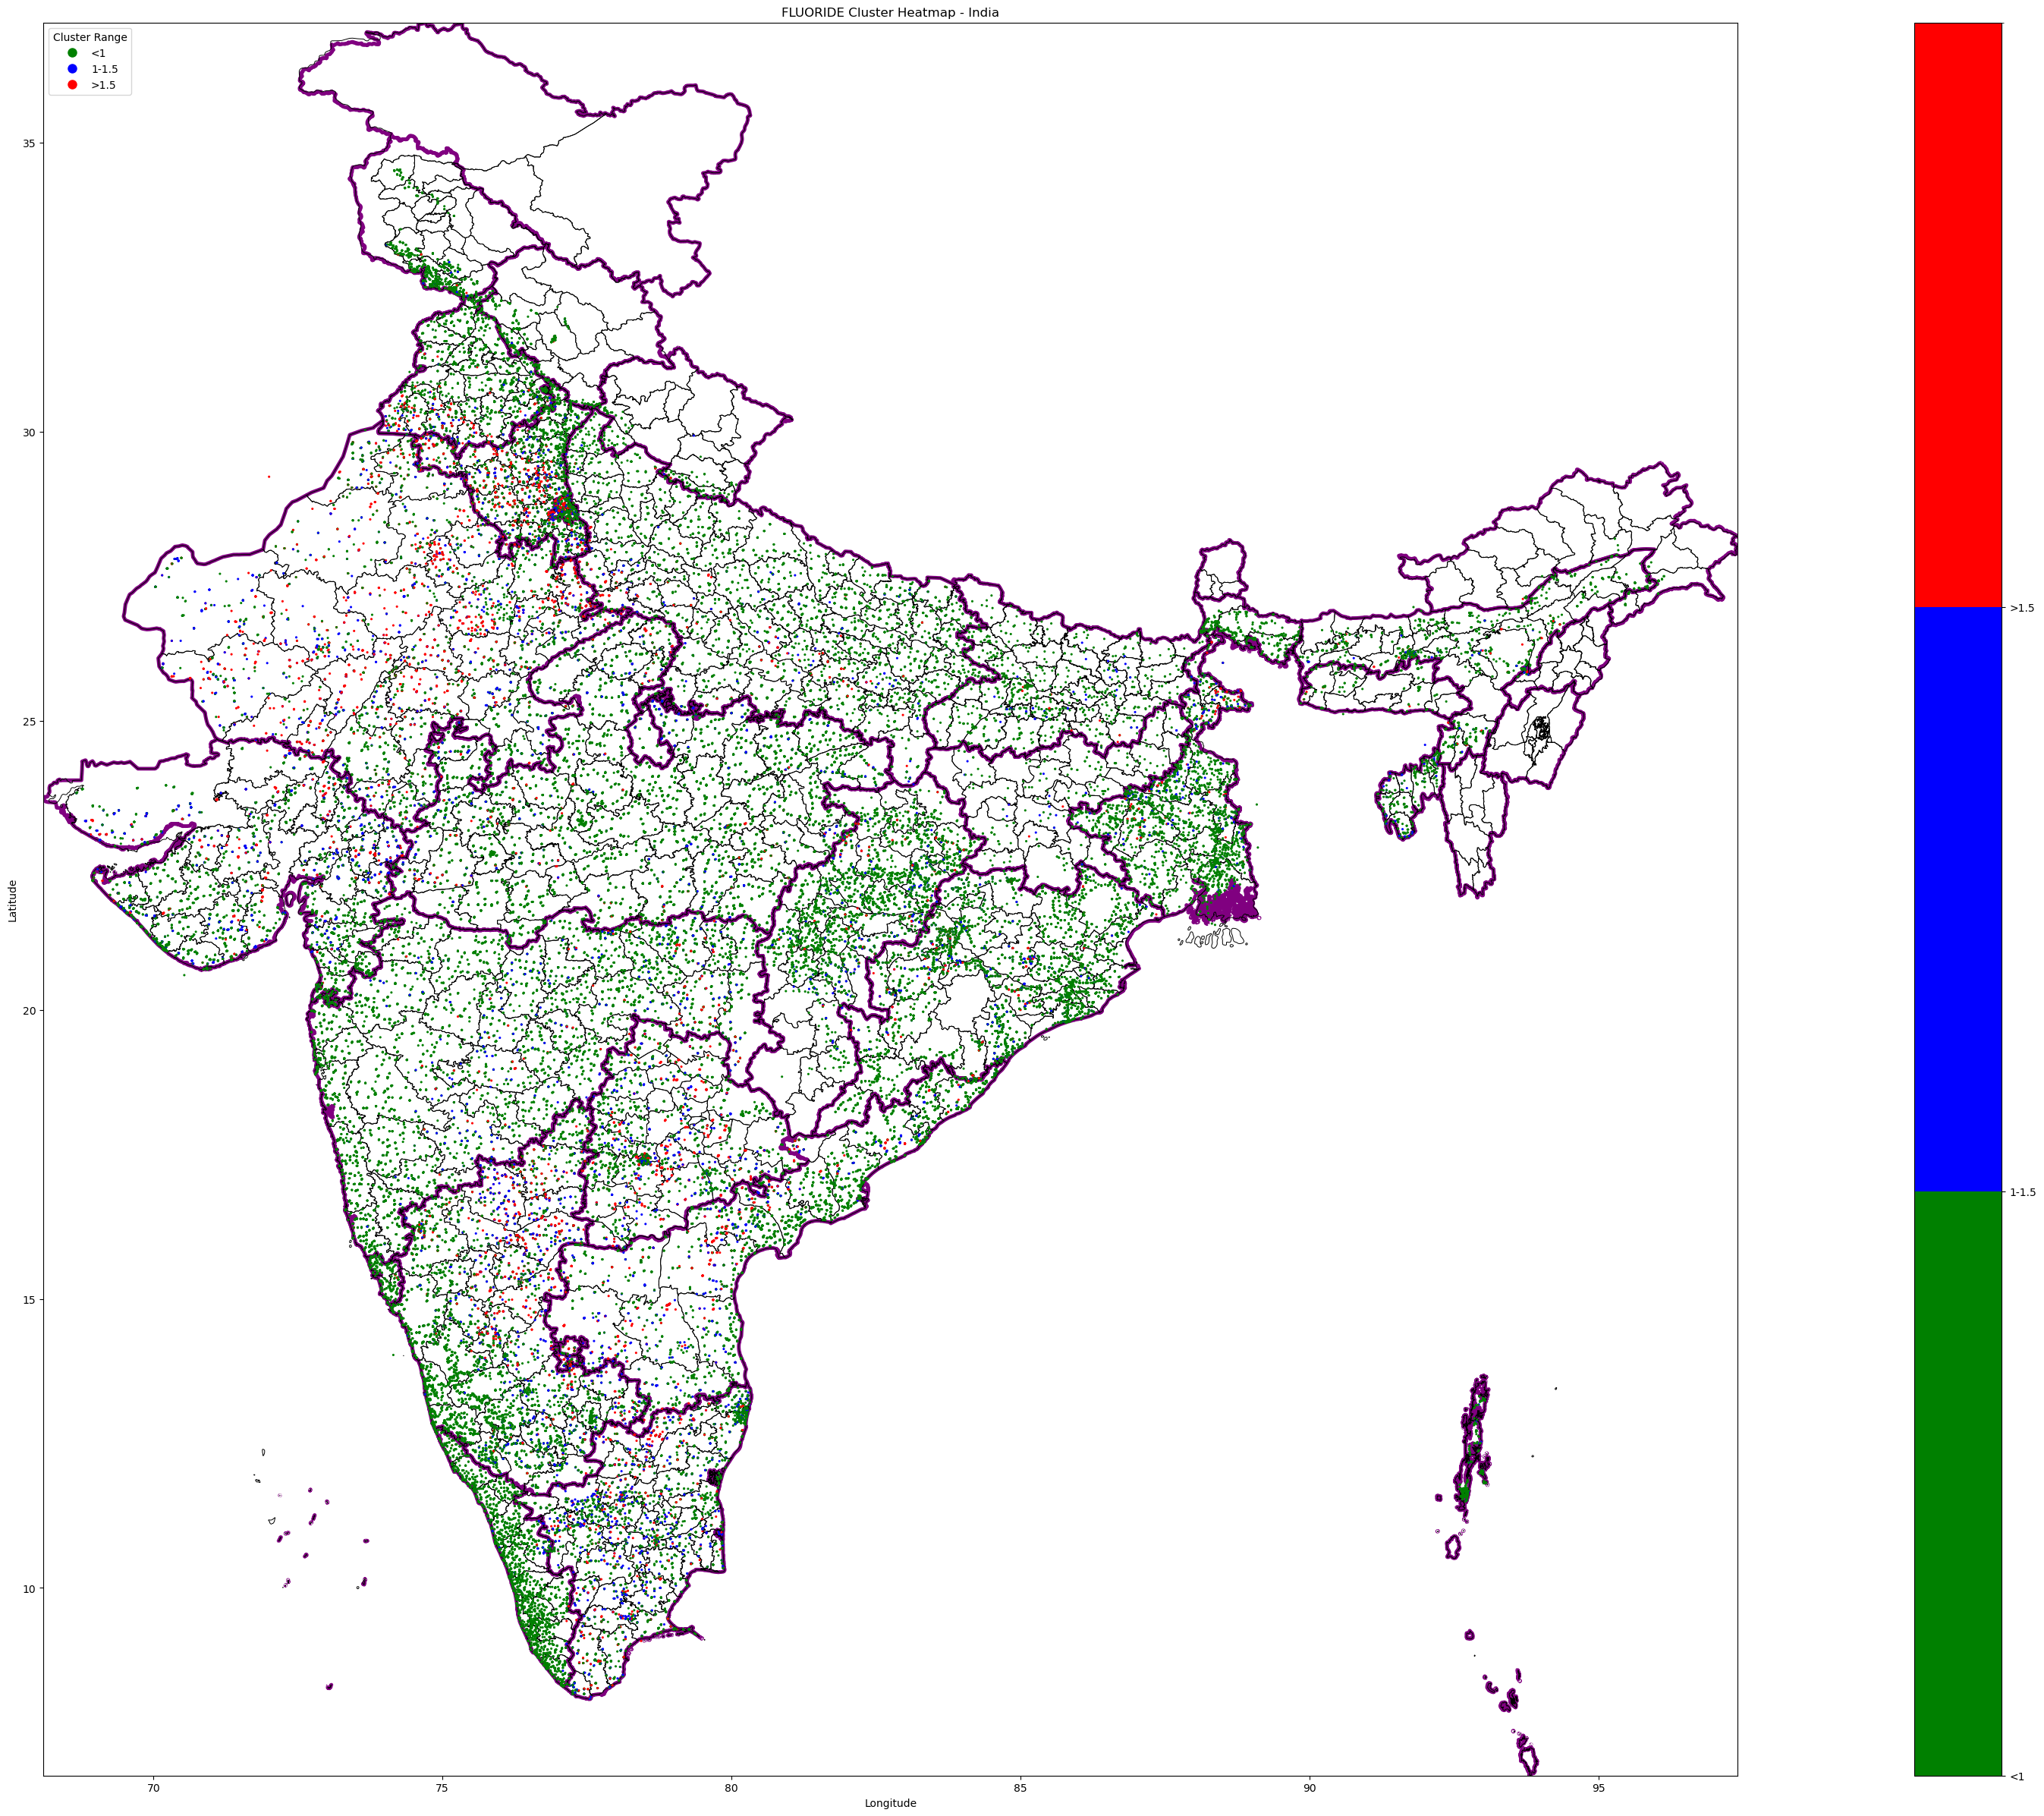

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Set the figure size
fig, ax = plt.subplots(figsize=(60, 30))

# Define the cluster ranges and corresponding colors
cluster_ranges = ['<1', '1-1.5', '>1.5']
cluster_colors = ['green', 'blue', 'red']


# Create a color map for the clusters
color_map = mcolors.ListedColormap(cluster_colors)
color_boundaries = [i for i in range(len(cluster_ranges) + 1)]
color_norm = mcolors.BoundaryNorm(color_boundaries, len(cluster_ranges))

# Read the districts data
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Plotting the map with state boundaries
states_data.plot(ax=ax, edgecolor='purple', linewidth=3.5, facecolor='none')

# Plotting the district boundaries on top of the state boundaries
districts_data.plot(ax=ax, edgecolor='black', linewidth=0.7, facecolor='none')

# Plot the TDS heatmap with the specified color map
gdf.plot(column='FLUORIDE_Cluster', cmap=color_map, markersize=5, legend=True, ax=ax, norm=color_norm, edgecolor='none')

# Set plot title and axis labels
plt.title('FLUORIDE Cluster Heatmap - India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust axis limits
ax.set_xlim(states_data.total_bounds[0], states_data.total_bounds[2])
ax.set_ylim(states_data.total_bounds[1], states_data.total_bounds[3])

# Create a legend with cluster ranges and colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=range_) for
                   range_, color in zip(cluster_ranges, cluster_colors)]
ax.legend(handles=legend_elements, title='Cluster Range', loc='upper left')

# Create a dummy mappable for the colorbar
dummy_cmap = cm.ScalarMappable(cmap=color_map, norm=color_norm)
dummy_cmap.set_array([])

# Add color bar
cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))
cbar.set_ticklabels(cluster_ranges)

# Save the plot as a PNG image with high quality
plt.savefig('heatmap.png', dpi=300)
# Show the plot
plt.show()